In [1]:
%run init_notebook.py

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [3]:
from settings import DATA_DIR, OUTPUT_DIR

In [4]:
data = pd.read_excel(os.path.join(DATA_DIR, "pivot_data.xlsx"))

In [5]:
data["ø Beh."] = data["ø Beh."].apply(lambda x: float(str(x).replace(",", ".")))

In [6]:
data.rename(columns={"#Beh." : "Behandlung"}, inplace=True)

In [7]:
kasse = data[data["Cluster"] == "Kasse"].groupby("Kurzz.").agg({"Umsatz" : "sum",
                                                        "ø Beh." : "sum",
                                                        "Behandlung" : "sum"})
kasse["Price"] = kasse["Umsatz"] / kasse["Behandlung"]

privat = data[data["Cluster"] == "Privat"].groupby("Kurzz.").agg({"Umsatz" : "sum",
                                                        "ø Beh." : "sum",
                                                        "Behandlung" : "sum"})
privat["Price"] = privat["Umsatz"] / kasse["Behandlung"]

bg = data[data["Cluster"] == "BG"].groupby("Kurzz.").agg({"Umsatz" : "sum",
                                                        "ø Beh." : "sum",
                                                        "Behandlung" : "sum"})
bg["Price"] = bg["Umsatz"] / bg["Behandlung"]

In [8]:
def list_func(df):
    
    list_all = []
    
    for item in df.index:
        
        list_all.extend(list([round(df.loc[item, "Price"], 2)] * df.loc[item, "Behandlung"]))
        
    return list_all

In [9]:
list_kasse = list_func(kasse)
list_privat = list_func(privat)
list_bg = list_func(bg)

In [49]:
from scipy import stats

def boot_strap(arr: np.array,
               sample_size: float,
              loop_size: int):
    
    output = []
    
    sample_size = round(len(arr) * sample_size)
    
    plt.figure(figsize=(10, 5))
    for item in list(range(0, loop_size)):
        _ = np.random.choice(arr, sample_size)
        sns.kdeplot(_)
        output.append(round(_.mean(), 2))
    
    plt.figure(figsize=(10, 5))
    sns.kdeplot(output)
    
    print("Bootstrap mean descriptives")
    print(stats.describe(output))
    print("Original data descriptives")
    print(stats.describe(arr))
    
    return output

Bootstrap mean descriptives
DescribeResult(nobs=200, minmax=(20.69, 22.01), mean=21.36375, variance=0.06367179648241204, skewness=-0.1109381400782314, kurtosis=-0.20470615728407315)
Original data descriptives
DescribeResult(nobs=15295, minmax=(0.84, 48.47), mean=21.349565871199744, variance=94.1883278486586, skewness=0.2789946489325613, kurtosis=-0.16792138885211605)
Bootstrap mean descriptives
DescribeResult(nobs=200, minmax=(11.0, 31.87), mean=21.815, variance=11.101459296482412, skewness=-0.20687541824428737, kurtosis=0.5457626281997463)
Original data descriptives
DescribeResult(nobs=2216, minmax=(0.35, 178.38), mean=21.407053249097476, variance=2521.816974202128, skewness=2.7497882213832834, kurtosis=5.634524409242834)
Bootstrap mean descriptives
DescribeResult(nobs=200, minmax=(18.39, 23.58), mean=20.7552, variance=0.9792281005025124, skewness=-0.0012340359003182916, kurtosis=-0.2524623862846256)
Original data descriptives
DescribeResult(nobs=420, minmax=(0.7, 37.66), mean=20.8588

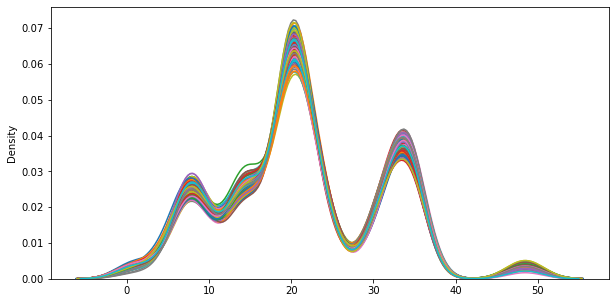

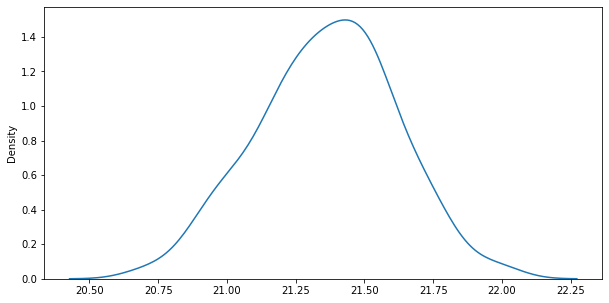

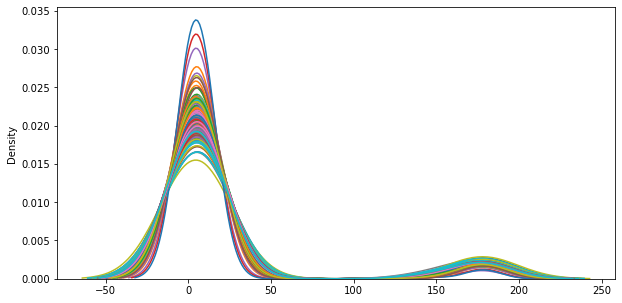

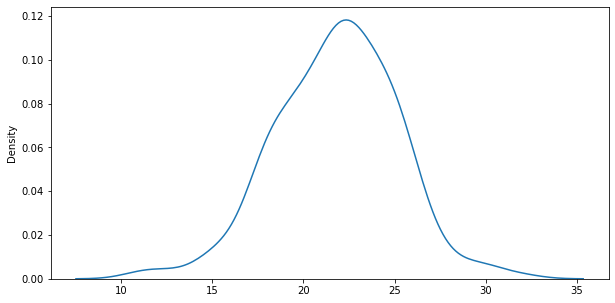

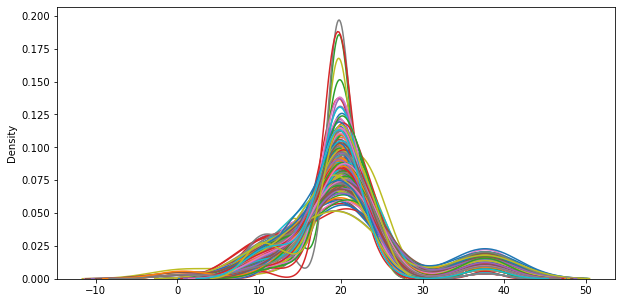

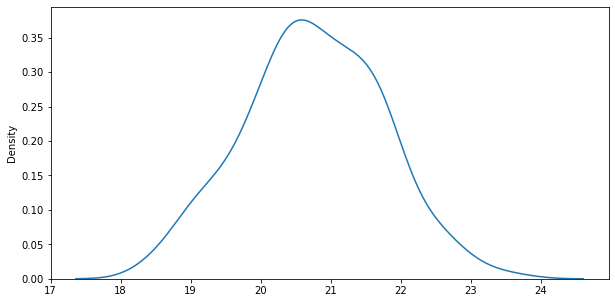

In [11]:
if __name__ == "__main__":
#     data = pd.read_csv(os.path.join(DATA_DIR, "data.csv"))
    data = np.array(list_kasse)
    
    output_kasse = boot_strap(data,
          sample_size=0.1,
          loop_size=200)
    
    data = np.array(list_privat)
    
    output_privat = boot_strap(data,
          sample_size=0.1,
          loop_size=200)
    
    data = np.array(list_bg)
    
    output_bg = boot_strap(data,
          sample_size=0.1,
          loop_size=200)

In [12]:
# saving

In [14]:
pd.DataFrame(data=[output_kasse, output_privat, output_bg],
             index=["kasse", "privat", "bg"]).transpose().to_excel(os.path.join(OUTPUT_DIR, "behandlungen_bootstrapped.xlsx"))

In [16]:
pd.DataFrame(data=[list_kasse, list_privat, list_bg],
             index=["kasse", "privat", "bg"]).transpose().to_excel(os.path.join(OUTPUT_DIR, "behandlungen_orgdata.xlsx"))

In [31]:
list(range(3, 6))

[3, 4, 5]

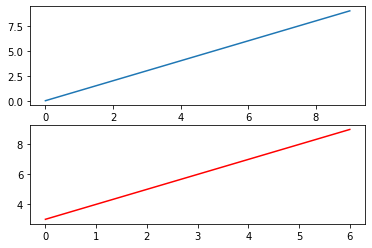

In [42]:
fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.plot(range(10))
ax2 = fig.add_subplot(212)
ax2.plot(range(3, 10), color = "red")

In [46]:
fig.savefig(os.path.join(OUTPUT_DIR, "test.png"))